# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

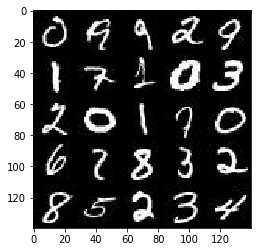

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

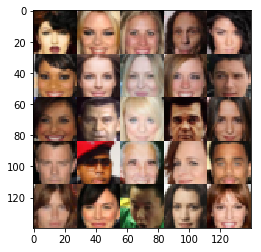

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    tensor_of_real_input_images = tf.placeholder(tf.float32, 
                                                 shape=(None, image_width, 
                                                        image_height, image_channels))
    tensor_of_z_data = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return (tensor_of_real_input_images, tensor_of_z_data, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input 28x28x3
        x = tf.layers.conv2d(inputs=images, 
                              filters=64, 
                              kernel_size=5, 
                              strides=2, 
                              padding="SAME", 
                              activation=None)
        relu = tf.maximum(alpha * x, x)
        # 14x14x32
        
        x = tf.layers.conv2d(inputs=relu, 
                              filters=128, 
                              kernel_size=5, 
                              strides=2, 
                              padding="SAME", 
                              activation=None)
        x = tf.layers.batch_normalization(x, training=True)
        relu = tf.maximum(alpha * x, x)
        # 7x7x128
        
        x = tf.layers.conv2d(inputs=relu, 
                             filters=256, 
                             kernel_size=5, 
                             strides=2, 
                             padding="SAME", 
                             activation=None)
        x = tf.layers.batch_normalization(x, training=True)
        relu = tf.maximum(alpha * x, x)
        # 4x4x256

        # Flat
        x = tf.reshape(relu, (-1, 4*4*256))
        logits = tf.layers.dense(inputs=x, 
                                 units=1, 
                                 activation=None)
        output = tf.sigmoid(logits)
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # 1st fully connected layer
        x = tf.layers.dense(inputs=z, 
                             units=7*7*256, 
                             activation=None)
        # Reshape to start convolutional stack
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        # 4x4x512 
        
        x = tf.layers.conv2d_transpose(inputs=x, 
                                        filters=128, 
                                        kernel_size=5, 
                                        strides=2, 
                                        padding="SAME", 
                                        activation=None)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        # 14x14x128 
        
        x = tf.layers.conv2d_transpose(inputs=x, 
                                        filters=64, 
                                        kernel_size=5, 
                                        strides=2, 
                                        padding="SAME", 
                                        activation=None)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        # 28x28x64
        
        # Output layer
        logits = tf.layers.conv2d_transpose(inputs=x, 
                                            filters=out_channel_dim, 
                                            kernel_size=5, 
                                            strides=1, 
                                            padding="SAME", 
                                            activation=None)
        # 28x28x?
        
        # logits = tf.slice(logits, [0, 2, 2, 0], [-1, 28, 28, -1])
        output = tf.tanh(logits)
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, 
                          out_channel_dim, 
                          is_train=True, 
                          alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, 
                                                reuse=False, 
                                                alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, 
                                                reuse=True, 
                                                alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_real, 
            labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, 
            labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, 
            labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1, alpha=0.2):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(
            learning_rate, 
            beta1=beta1
        ).minimize(
            d_loss, 
            var_list=d_vars)
        
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, 
            beta1=beta1
        ).minimize(
            g_loss, 
            var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, 
          learning_rate, beta1, get_batches, 
          data_shape, data_image_mode,
          show_interval = 100, print_interval = 20):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={
                    input_real: batch_images, 
                    input_z: batch_z, 
                    learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                    input_real: batch_images, 
                    input_z: batch_z, 
                    learn_rate: learning_rate})
                
                if steps % print_interval == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_interval == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                    
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.0017... Generator Loss: 12.7150
Epoch 0/2... Discriminator Loss: 3.4875... Generator Loss: 1.3438
Epoch 0/2... Discriminator Loss: 0.3231... Generator Loss: 3.1266
Epoch 0/2... Discriminator Loss: 0.0508... Generator Loss: 7.0218
Epoch 0/2... Discriminator Loss: 0.8814... Generator Loss: 1.0699


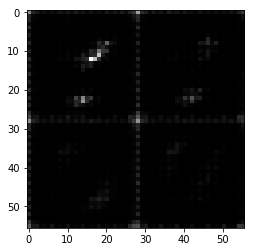

Epoch 0/2... Discriminator Loss: 1.0459... Generator Loss: 2.2445
Epoch 0/2... Discriminator Loss: 1.1831... Generator Loss: 1.6950
Epoch 0/2... Discriminator Loss: 1.3717... Generator Loss: 0.4613
Epoch 0/2... Discriminator Loss: 1.0025... Generator Loss: 1.1587
Epoch 0/2... Discriminator Loss: 1.1196... Generator Loss: 2.5941


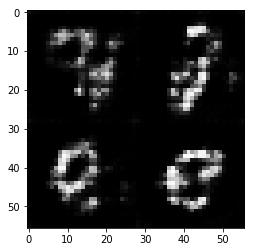

Epoch 0/2... Discriminator Loss: 0.9091... Generator Loss: 0.9760
Epoch 0/2... Discriminator Loss: 1.2100... Generator Loss: 2.2545
Epoch 0/2... Discriminator Loss: 0.8742... Generator Loss: 1.0289
Epoch 0/2... Discriminator Loss: 1.0988... Generator Loss: 0.6845
Epoch 0/2... Discriminator Loss: 1.1706... Generator Loss: 1.9109


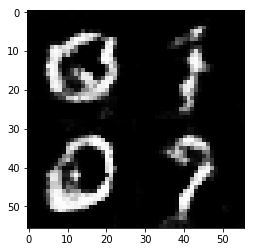

Epoch 0/2... Discriminator Loss: 1.1771... Generator Loss: 0.5854
Epoch 0/2... Discriminator Loss: 1.0702... Generator Loss: 1.4825
Epoch 0/2... Discriminator Loss: 1.0114... Generator Loss: 1.2918
Epoch 0/2... Discriminator Loss: 1.2264... Generator Loss: 2.0011
Epoch 0/2... Discriminator Loss: 1.0354... Generator Loss: 0.7304


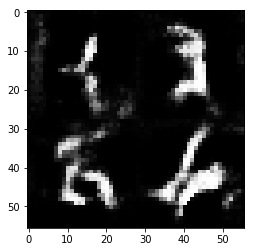

Epoch 0/2... Discriminator Loss: 1.1248... Generator Loss: 0.6653
Epoch 0/2... Discriminator Loss: 1.0526... Generator Loss: 1.0395
Epoch 0/2... Discriminator Loss: 1.0151... Generator Loss: 0.8506
Epoch 1/2... Discriminator Loss: 1.1205... Generator Loss: 0.5752
Epoch 1/2... Discriminator Loss: 0.9437... Generator Loss: 0.7785


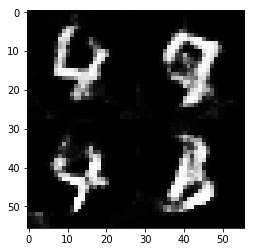

Epoch 1/2... Discriminator Loss: 0.8036... Generator Loss: 1.6750
Epoch 1/2... Discriminator Loss: 0.9335... Generator Loss: 1.9926
Epoch 1/2... Discriminator Loss: 1.1981... Generator Loss: 0.5992
Epoch 1/2... Discriminator Loss: 1.1160... Generator Loss: 0.5966
Epoch 1/2... Discriminator Loss: 0.8961... Generator Loss: 0.7817


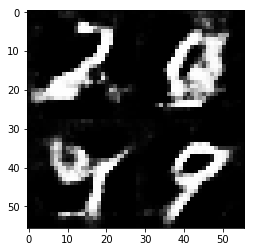

Epoch 1/2... Discriminator Loss: 0.8716... Generator Loss: 1.2843
Epoch 1/2... Discriminator Loss: 0.7209... Generator Loss: 1.7169
Epoch 1/2... Discriminator Loss: 0.7123... Generator Loss: 1.6329
Epoch 1/2... Discriminator Loss: 0.7719... Generator Loss: 0.9725
Epoch 1/2... Discriminator Loss: 0.8294... Generator Loss: 0.8610


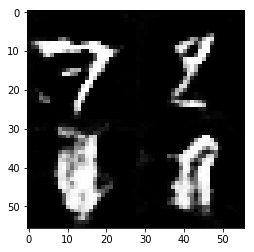

Epoch 1/2... Discriminator Loss: 0.6910... Generator Loss: 1.2392
Epoch 1/2... Discriminator Loss: 0.7549... Generator Loss: 1.2237
Epoch 1/2... Discriminator Loss: 1.0344... Generator Loss: 0.6776
Epoch 1/2... Discriminator Loss: 0.9063... Generator Loss: 0.8564
Epoch 1/2... Discriminator Loss: 0.6059... Generator Loss: 2.5848


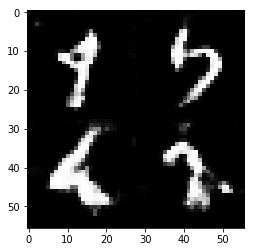

Epoch 1/2... Discriminator Loss: 0.6517... Generator Loss: 1.2977
Epoch 1/2... Discriminator Loss: 0.4686... Generator Loss: 1.5199
Epoch 1/2... Discriminator Loss: 0.6739... Generator Loss: 1.2362
Epoch 1/2... Discriminator Loss: 0.5482... Generator Loss: 1.2399
Epoch 1/2... Discriminator Loss: 1.0071... Generator Loss: 0.8933


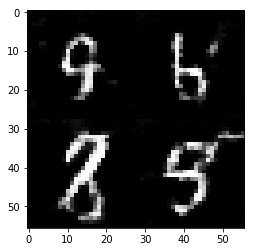

Epoch 1/2... Discriminator Loss: 0.9919... Generator Loss: 0.7060


In [12]:
batch_size = 128
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.3065... Generator Loss: 4.8996
Epoch 0/1... Discriminator Loss: 0.0775... Generator Loss: 17.9468
Epoch 0/1... Discriminator Loss: 0.4574... Generator Loss: 20.3618
Epoch 0/1... Discriminator Loss: 0.4708... Generator Loss: 22.6480


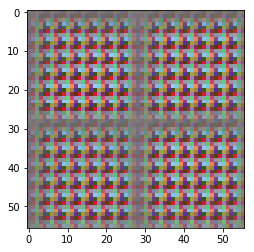

Epoch 0/1... Discriminator Loss: 0.0144... Generator Loss: 15.9065
Epoch 0/1... Discriminator Loss: 0.0601... Generator Loss: 17.1763
Epoch 0/1... Discriminator Loss: 0.1154... Generator Loss: 13.7138
Epoch 0/1... Discriminator Loss: 0.1799... Generator Loss: 21.6553


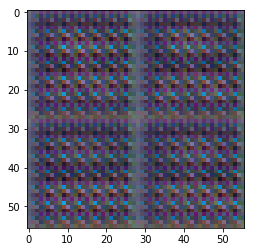

Epoch 0/1... Discriminator Loss: 0.1047... Generator Loss: 8.5327
Epoch 0/1... Discriminator Loss: 0.4911... Generator Loss: 5.4716
Epoch 0/1... Discriminator Loss: 0.5124... Generator Loss: 2.2417
Epoch 0/1... Discriminator Loss: 1.4805... Generator Loss: 0.5791


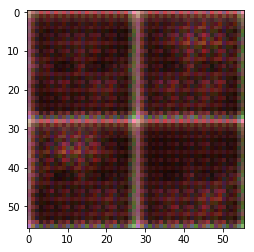

Epoch 0/1... Discriminator Loss: 0.6922... Generator Loss: 1.6413
Epoch 0/1... Discriminator Loss: 0.9243... Generator Loss: 0.9589
Epoch 0/1... Discriminator Loss: 1.0703... Generator Loss: 0.6998
Epoch 0/1... Discriminator Loss: 0.6180... Generator Loss: 1.2654


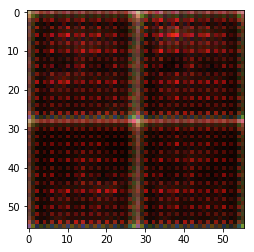

Epoch 0/1... Discriminator Loss: 2.4353... Generator Loss: 9.3328
Epoch 0/1... Discriminator Loss: 1.0412... Generator Loss: 0.7810
Epoch 0/1... Discriminator Loss: 1.1840... Generator Loss: 0.4798
Epoch 0/1... Discriminator Loss: 0.4723... Generator Loss: 1.9778


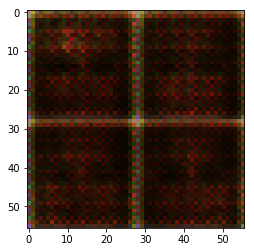

Epoch 0/1... Discriminator Loss: 1.1890... Generator Loss: 0.5445
Epoch 0/1... Discriminator Loss: 0.1534... Generator Loss: 2.9650
Epoch 0/1... Discriminator Loss: 0.3641... Generator Loss: 1.4164
Epoch 0/1... Discriminator Loss: 0.3329... Generator Loss: 1.7796


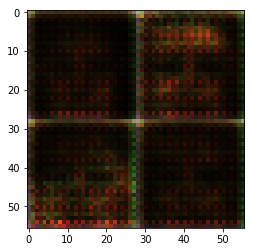

Epoch 0/1... Discriminator Loss: 0.3657... Generator Loss: 1.7408
Epoch 0/1... Discriminator Loss: 1.1077... Generator Loss: 0.5443
Epoch 0/1... Discriminator Loss: 0.6574... Generator Loss: 1.1076
Epoch 0/1... Discriminator Loss: 0.1026... Generator Loss: 2.9977


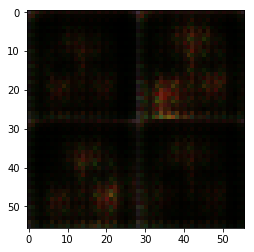

Epoch 0/1... Discriminator Loss: 1.0360... Generator Loss: 5.2767
Epoch 0/1... Discriminator Loss: 0.1582... Generator Loss: 2.9704
Epoch 0/1... Discriminator Loss: 0.2164... Generator Loss: 4.0818
Epoch 0/1... Discriminator Loss: 2.2654... Generator Loss: 0.1518


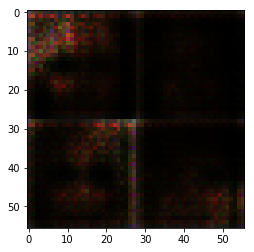

Epoch 0/1... Discriminator Loss: 0.5203... Generator Loss: 1.4326
Epoch 0/1... Discriminator Loss: 1.3823... Generator Loss: 0.7269
Epoch 0/1... Discriminator Loss: 1.5277... Generator Loss: 0.3518
Epoch 0/1... Discriminator Loss: 0.7235... Generator Loss: 1.1100


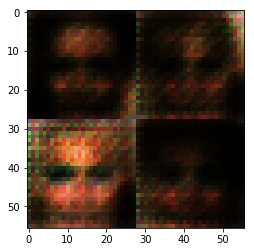

Epoch 0/1... Discriminator Loss: 0.4886... Generator Loss: 1.5062
Epoch 0/1... Discriminator Loss: 0.5895... Generator Loss: 1.4200
Epoch 0/1... Discriminator Loss: 1.2979... Generator Loss: 0.5314
Epoch 0/1... Discriminator Loss: 0.9775... Generator Loss: 0.6049


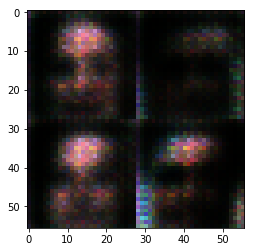

Epoch 0/1... Discriminator Loss: 0.2819... Generator Loss: 2.1808
Epoch 0/1... Discriminator Loss: 2.1494... Generator Loss: 0.1623
Epoch 0/1... Discriminator Loss: 1.1113... Generator Loss: 0.5561
Epoch 0/1... Discriminator Loss: 0.6547... Generator Loss: 3.3499


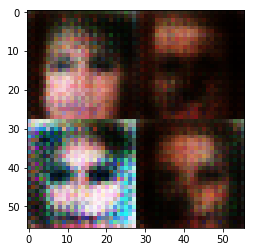

Epoch 0/1... Discriminator Loss: 0.8032... Generator Loss: 0.9750
Epoch 0/1... Discriminator Loss: 1.8847... Generator Loss: 4.4910
Epoch 0/1... Discriminator Loss: 0.5255... Generator Loss: 3.8058
Epoch 0/1... Discriminator Loss: 0.4535... Generator Loss: 1.5540


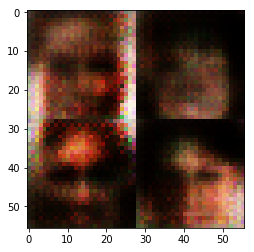

Epoch 0/1... Discriminator Loss: 0.8503... Generator Loss: 7.1281
Epoch 0/1... Discriminator Loss: 1.0816... Generator Loss: 0.7485
Epoch 0/1... Discriminator Loss: 1.3495... Generator Loss: 8.7434
Epoch 0/1... Discriminator Loss: 0.3059... Generator Loss: 4.3678


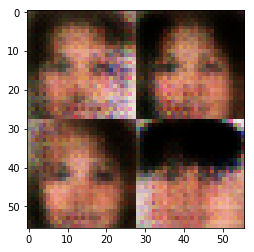

Epoch 0/1... Discriminator Loss: 1.1279... Generator Loss: 0.6583
Epoch 0/1... Discriminator Loss: 0.3501... Generator Loss: 2.0710
Epoch 0/1... Discriminator Loss: 1.0400... Generator Loss: 0.6234
Epoch 0/1... Discriminator Loss: 1.9211... Generator Loss: 4.2837


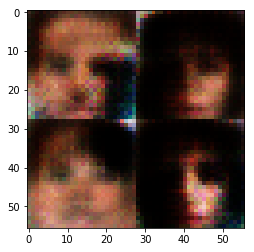

Epoch 0/1... Discriminator Loss: 0.1600... Generator Loss: 3.2880
Epoch 0/1... Discriminator Loss: 2.3599... Generator Loss: 0.1538
Epoch 0/1... Discriminator Loss: 0.5637... Generator Loss: 2.7378
Epoch 0/1... Discriminator Loss: 0.3997... Generator Loss: 1.5729


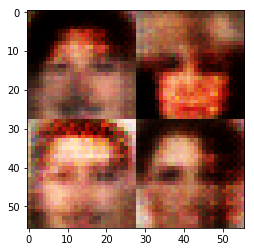

Epoch 0/1... Discriminator Loss: 0.3262... Generator Loss: 2.1080
Epoch 0/1... Discriminator Loss: 0.7713... Generator Loss: 0.9765
Epoch 0/1... Discriminator Loss: 0.3968... Generator Loss: 1.9189
Epoch 0/1... Discriminator Loss: 1.3346... Generator Loss: 0.4497


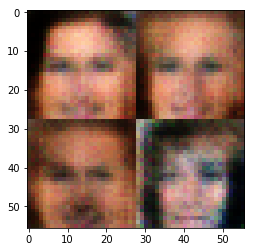

Epoch 0/1... Discriminator Loss: 0.7931... Generator Loss: 0.8246
Epoch 0/1... Discriminator Loss: 0.3703... Generator Loss: 1.6985
Epoch 0/1... Discriminator Loss: 0.6159... Generator Loss: 2.0753
Epoch 0/1... Discriminator Loss: 0.2022... Generator Loss: 2.3906


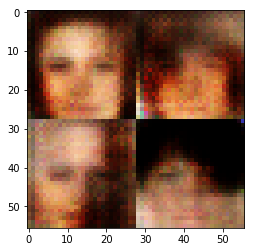

Epoch 0/1... Discriminator Loss: 0.4218... Generator Loss: 1.4366
Epoch 0/1... Discriminator Loss: 0.2341... Generator Loss: 3.3620
Epoch 0/1... Discriminator Loss: 0.6427... Generator Loss: 0.9672
Epoch 0/1... Discriminator Loss: 0.8575... Generator Loss: 0.7574


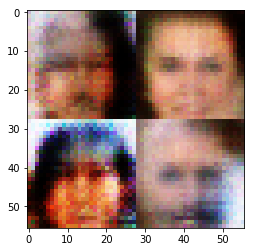

Epoch 0/1... Discriminator Loss: 0.2060... Generator Loss: 3.1584
Epoch 0/1... Discriminator Loss: 0.2499... Generator Loss: 3.1824
Epoch 0/1... Discriminator Loss: 0.2900... Generator Loss: 2.5977
Epoch 0/1... Discriminator Loss: 0.8516... Generator Loss: 0.7353


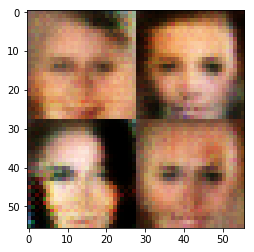

Epoch 0/1... Discriminator Loss: 0.3643... Generator Loss: 1.8785
Epoch 0/1... Discriminator Loss: 1.5853... Generator Loss: 4.8221
Epoch 0/1... Discriminator Loss: 0.3679... Generator Loss: 2.0182
Epoch 0/1... Discriminator Loss: 1.7691... Generator Loss: 0.3097


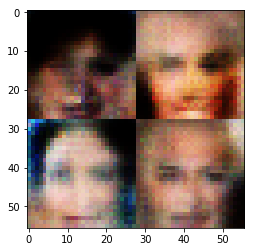

Epoch 0/1... Discriminator Loss: 0.3459... Generator Loss: 4.1388
Epoch 0/1... Discriminator Loss: 0.3727... Generator Loss: 1.5395
Epoch 0/1... Discriminator Loss: 0.6733... Generator Loss: 1.2099
Epoch 0/1... Discriminator Loss: 1.6660... Generator Loss: 0.3085


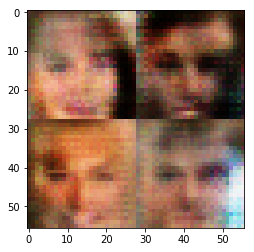

Epoch 0/1... Discriminator Loss: 0.6693... Generator Loss: 1.1793
Epoch 0/1... Discriminator Loss: 0.1536... Generator Loss: 4.0840
Epoch 0/1... Discriminator Loss: 0.6857... Generator Loss: 1.0679
Epoch 0/1... Discriminator Loss: 1.9866... Generator Loss: 0.2445


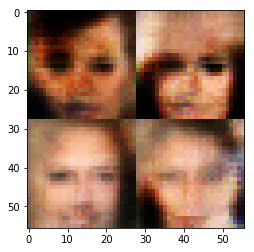

Epoch 0/1... Discriminator Loss: 0.3331... Generator Loss: 1.7973
Epoch 0/1... Discriminator Loss: 0.2240... Generator Loss: 2.3645
Epoch 0/1... Discriminator Loss: 0.7024... Generator Loss: 1.0125
Epoch 0/1... Discriminator Loss: 0.3631... Generator Loss: 2.3301


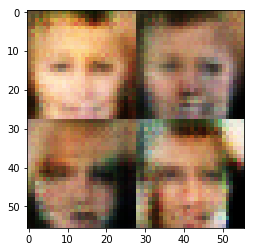

Epoch 0/1... Discriminator Loss: 0.4494... Generator Loss: 4.8680
Epoch 0/1... Discriminator Loss: 0.1911... Generator Loss: 2.5021
Epoch 0/1... Discriminator Loss: 0.3063... Generator Loss: 1.8943
Epoch 0/1... Discriminator Loss: 0.2707... Generator Loss: 4.2708


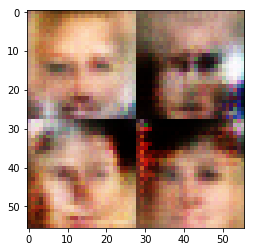

Epoch 0/1... Discriminator Loss: 0.5375... Generator Loss: 1.1931
Epoch 0/1... Discriminator Loss: 0.5659... Generator Loss: 1.1687
Epoch 0/1... Discriminator Loss: 0.1111... Generator Loss: 2.9374
Epoch 0/1... Discriminator Loss: 0.7728... Generator Loss: 0.9110


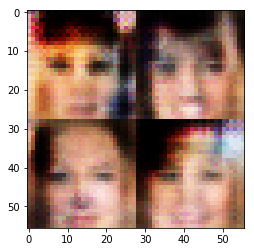

Epoch 0/1... Discriminator Loss: 0.1797... Generator Loss: 2.6573
Epoch 0/1... Discriminator Loss: 0.1633... Generator Loss: 2.6302
Epoch 0/1... Discriminator Loss: 1.3421... Generator Loss: 0.4273
Epoch 0/1... Discriminator Loss: 1.7638... Generator Loss: 0.2948


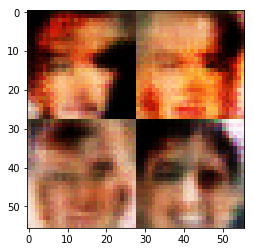

Epoch 0/1... Discriminator Loss: 0.3725... Generator Loss: 1.5989
Epoch 0/1... Discriminator Loss: 0.2178... Generator Loss: 4.4284
Epoch 0/1... Discriminator Loss: 0.6407... Generator Loss: 3.2964
Epoch 0/1... Discriminator Loss: 0.3472... Generator Loss: 2.1065


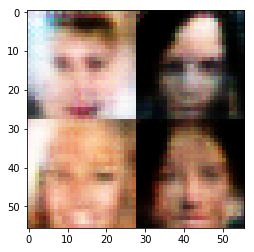

Epoch 0/1... Discriminator Loss: 0.2395... Generator Loss: 3.0829
Epoch 0/1... Discriminator Loss: 0.2306... Generator Loss: 1.9268
Epoch 0/1... Discriminator Loss: 0.1873... Generator Loss: 2.6522
Epoch 0/1... Discriminator Loss: 0.2787... Generator Loss: 3.4278


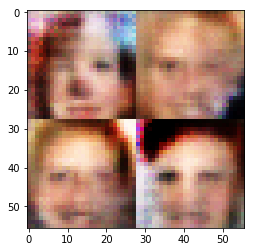

Epoch 0/1... Discriminator Loss: 0.2490... Generator Loss: 2.6651
Epoch 0/1... Discriminator Loss: 0.2840... Generator Loss: 3.2495
Epoch 0/1... Discriminator Loss: 0.4990... Generator Loss: 5.9720
Epoch 0/1... Discriminator Loss: 0.4087... Generator Loss: 1.3836


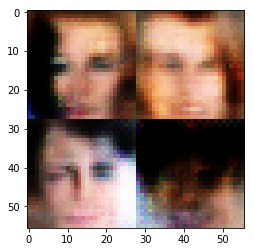

Epoch 0/1... Discriminator Loss: 0.2442... Generator Loss: 2.9992
Epoch 0/1... Discriminator Loss: 0.2957... Generator Loss: 2.1377
Epoch 0/1... Discriminator Loss: 0.6558... Generator Loss: 3.5848
Epoch 0/1... Discriminator Loss: 2.9577... Generator Loss: 5.5211


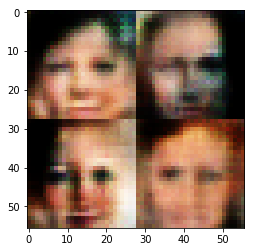

Epoch 0/1... Discriminator Loss: 1.5656... Generator Loss: 0.4517
Epoch 0/1... Discriminator Loss: 2.0245... Generator Loss: 2.3433
Epoch 0/1... Discriminator Loss: 0.8397... Generator Loss: 0.8509
Epoch 0/1... Discriminator Loss: 0.7349... Generator Loss: 1.4847


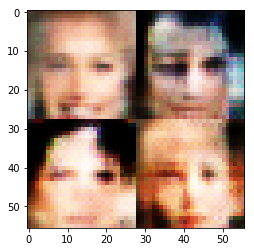

Epoch 0/1... Discriminator Loss: 0.6906... Generator Loss: 1.2274
Epoch 0/1... Discriminator Loss: 0.5613... Generator Loss: 1.3072
Epoch 0/1... Discriminator Loss: 0.5330... Generator Loss: 1.9971
Epoch 0/1... Discriminator Loss: 0.3990... Generator Loss: 1.6750


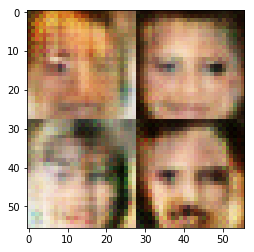

Epoch 0/1... Discriminator Loss: 0.3823... Generator Loss: 1.8308
Epoch 0/1... Discriminator Loss: 0.2017... Generator Loss: 2.6644
Epoch 0/1... Discriminator Loss: 0.5139... Generator Loss: 1.2107
Epoch 0/1... Discriminator Loss: 0.4260... Generator Loss: 2.4448


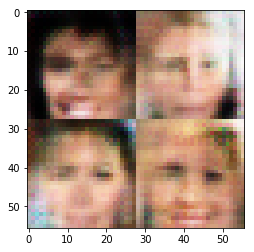

Epoch 0/1... Discriminator Loss: 0.8138... Generator Loss: 0.8203
Epoch 0/1... Discriminator Loss: 0.2378... Generator Loss: 2.6434
Epoch 0/1... Discriminator Loss: 0.2180... Generator Loss: 2.8788
Epoch 0/1... Discriminator Loss: 0.6519... Generator Loss: 3.4046


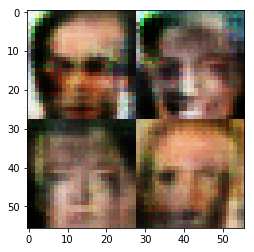

Epoch 0/1... Discriminator Loss: 0.2316... Generator Loss: 2.1820
Epoch 0/1... Discriminator Loss: 0.7838... Generator Loss: 0.8047
Epoch 0/1... Discriminator Loss: 0.7976... Generator Loss: 0.8238
Epoch 0/1... Discriminator Loss: 1.0381... Generator Loss: 0.6244


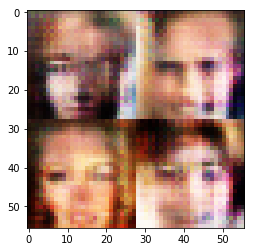

Epoch 0/1... Discriminator Loss: 0.1748... Generator Loss: 3.3953
Epoch 0/1... Discriminator Loss: 0.2012... Generator Loss: 3.0836
Epoch 0/1... Discriminator Loss: 0.3474... Generator Loss: 1.6413
Epoch 0/1... Discriminator Loss: 0.2206... Generator Loss: 2.6262


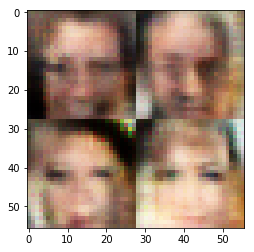

Epoch 0/1... Discriminator Loss: 0.5953... Generator Loss: 3.1049
Epoch 0/1... Discriminator Loss: 0.2366... Generator Loss: 2.4884
Epoch 0/1... Discriminator Loss: 0.5068... Generator Loss: 1.3384
Epoch 0/1... Discriminator Loss: 0.3266... Generator Loss: 1.8090


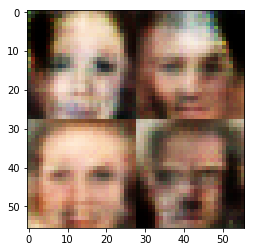

Epoch 0/1... Discriminator Loss: 0.3339... Generator Loss: 1.9820
Epoch 0/1... Discriminator Loss: 0.3852... Generator Loss: 1.6104
Epoch 0/1... Discriminator Loss: 0.1694... Generator Loss: 2.9371
Epoch 0/1... Discriminator Loss: 0.1868... Generator Loss: 2.4888


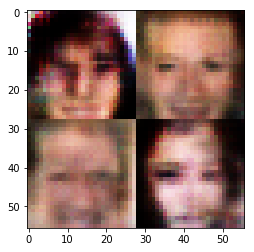

Epoch 0/1... Discriminator Loss: 0.2159... Generator Loss: 2.2732
Epoch 0/1... Discriminator Loss: 0.7868... Generator Loss: 0.8434
Epoch 0/1... Discriminator Loss: 0.2676... Generator Loss: 2.1228
Epoch 0/1... Discriminator Loss: 0.7262... Generator Loss: 0.8419


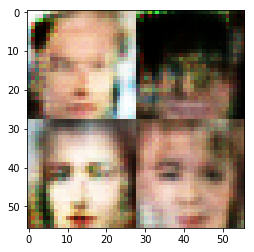

Epoch 0/1... Discriminator Loss: 0.2627... Generator Loss: 3.3755
Epoch 0/1... Discriminator Loss: 0.4012... Generator Loss: 1.5560
Epoch 0/1... Discriminator Loss: 0.7969... Generator Loss: 0.8193
Epoch 0/1... Discriminator Loss: 1.3419... Generator Loss: 0.5252


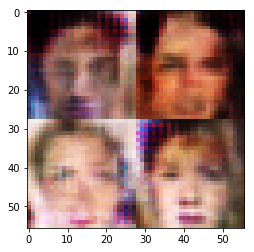

Epoch 0/1... Discriminator Loss: 0.6163... Generator Loss: 1.0805
Epoch 0/1... Discriminator Loss: 0.7596... Generator Loss: 0.9616
Epoch 0/1... Discriminator Loss: 0.6966... Generator Loss: 1.0462
Epoch 0/1... Discriminator Loss: 0.1887... Generator Loss: 2.7939


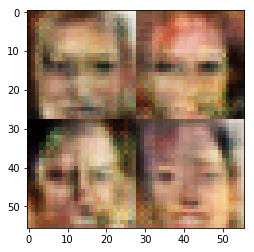

Epoch 0/1... Discriminator Loss: 0.8741... Generator Loss: 0.7146
Epoch 0/1... Discriminator Loss: 0.3165... Generator Loss: 1.7613
Epoch 0/1... Discriminator Loss: 0.3083... Generator Loss: 1.8515
Epoch 0/1... Discriminator Loss: 0.1446... Generator Loss: 2.6587


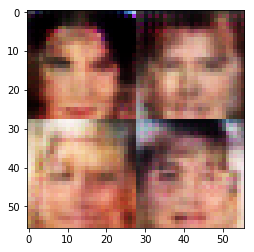

Epoch 0/1... Discriminator Loss: 0.3937... Generator Loss: 1.5289
Epoch 0/1... Discriminator Loss: 0.4918... Generator Loss: 1.2924
Epoch 0/1... Discriminator Loss: 0.6861... Generator Loss: 0.9207
Epoch 0/1... Discriminator Loss: 1.6284... Generator Loss: 0.3743


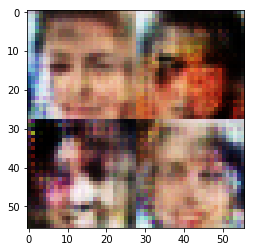

Epoch 0/1... Discriminator Loss: 0.2916... Generator Loss: 2.4456
Epoch 0/1... Discriminator Loss: 0.6963... Generator Loss: 0.8793
Epoch 0/1... Discriminator Loss: 0.2694... Generator Loss: 2.3929
Epoch 0/1... Discriminator Loss: 4.3521... Generator Loss: 5.1713


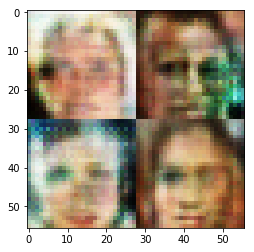

Epoch 0/1... Discriminator Loss: 0.8752... Generator Loss: 0.8285
Epoch 0/1... Discriminator Loss: 0.5769... Generator Loss: 1.2082
Epoch 0/1... Discriminator Loss: 1.1429... Generator Loss: 0.5132
Epoch 0/1... Discriminator Loss: 0.4828... Generator Loss: 1.3605


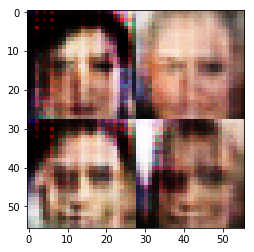

Epoch 0/1... Discriminator Loss: 0.8172... Generator Loss: 0.9105
Epoch 0/1... Discriminator Loss: 0.3310... Generator Loss: 1.9342
Epoch 0/1... Discriminator Loss: 0.3748... Generator Loss: 1.6423
Epoch 0/1... Discriminator Loss: 0.2492... Generator Loss: 2.3205


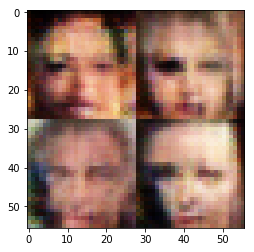

Epoch 0/1... Discriminator Loss: 0.2921... Generator Loss: 1.7365
Epoch 0/1... Discriminator Loss: 0.2868... Generator Loss: 2.2441
Epoch 0/1... Discriminator Loss: 0.7738... Generator Loss: 0.8558
Epoch 0/1... Discriminator Loss: 0.5059... Generator Loss: 1.2128


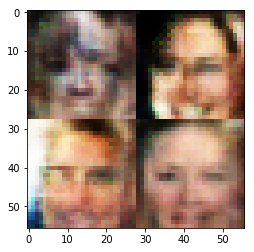

Epoch 0/1... Discriminator Loss: 0.3317... Generator Loss: 1.8286
Epoch 0/1... Discriminator Loss: 0.3015... Generator Loss: 1.8419
Epoch 0/1... Discriminator Loss: 0.3920... Generator Loss: 1.6681
Epoch 0/1... Discriminator Loss: 0.2946... Generator Loss: 2.4088


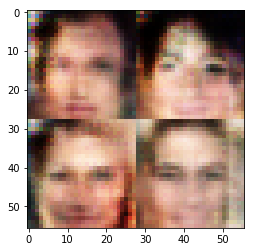

Epoch 0/1... Discriminator Loss: 0.2709... Generator Loss: 1.8865
Epoch 0/1... Discriminator Loss: 0.4263... Generator Loss: 1.3418
Epoch 0/1... Discriminator Loss: 0.2646... Generator Loss: 1.9735
Epoch 0/1... Discriminator Loss: 0.7154... Generator Loss: 4.0273


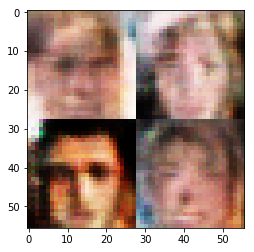

Epoch 0/1... Discriminator Loss: 0.5311... Generator Loss: 1.2804
Epoch 0/1... Discriminator Loss: 0.2705... Generator Loss: 1.9477
Epoch 0/1... Discriminator Loss: 0.2939... Generator Loss: 3.6361
Epoch 0/1... Discriminator Loss: 0.1552... Generator Loss: 3.1321


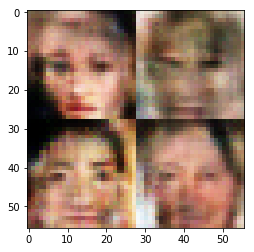

Epoch 0/1... Discriminator Loss: 0.3890... Generator Loss: 1.4511
Epoch 0/1... Discriminator Loss: 0.3157... Generator Loss: 1.6896
Epoch 0/1... Discriminator Loss: 0.2218... Generator Loss: 2.2297
Epoch 0/1... Discriminator Loss: 0.2016... Generator Loss: 2.5327


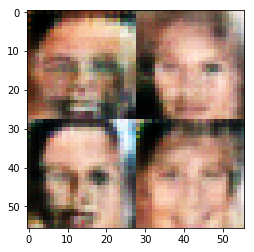

Epoch 0/1... Discriminator Loss: 0.2115... Generator Loss: 2.2663
Epoch 0/1... Discriminator Loss: 0.1938... Generator Loss: 2.3715
Epoch 0/1... Discriminator Loss: 0.2529... Generator Loss: 1.9939
Epoch 0/1... Discriminator Loss: 0.2788... Generator Loss: 3.5730


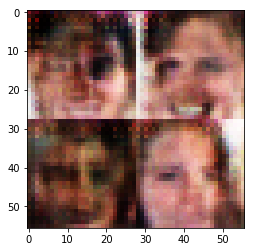

Epoch 0/1... Discriminator Loss: 0.3604... Generator Loss: 1.8518
Epoch 0/1... Discriminator Loss: 0.1503... Generator Loss: 3.1185
Epoch 0/1... Discriminator Loss: 0.2406... Generator Loss: 2.1575
Epoch 0/1... Discriminator Loss: 0.0940... Generator Loss: 3.5649


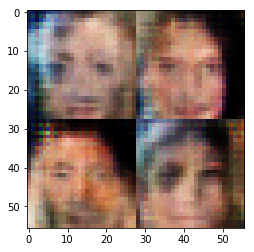

Epoch 0/1... Discriminator Loss: 0.3778... Generator Loss: 1.5898
Epoch 0/1... Discriminator Loss: 0.3994... Generator Loss: 2.9513
Epoch 0/1... Discriminator Loss: 0.3995... Generator Loss: 2.4020
Epoch 0/1... Discriminator Loss: 0.5106... Generator Loss: 1.3566


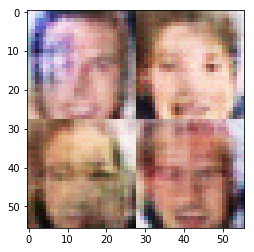

Epoch 0/1... Discriminator Loss: 0.3083... Generator Loss: 1.9589
Epoch 0/1... Discriminator Loss: 1.4172... Generator Loss: 0.4531
Epoch 0/1... Discriminator Loss: 0.2704... Generator Loss: 2.2507
Epoch 0/1... Discriminator Loss: 0.2908... Generator Loss: 1.9064


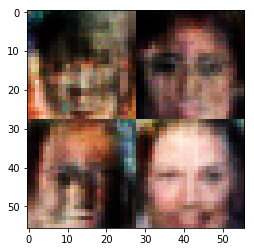

Epoch 0/1... Discriminator Loss: 0.3519... Generator Loss: 1.6879
Epoch 0/1... Discriminator Loss: 0.1275... Generator Loss: 2.8648
Epoch 0/1... Discriminator Loss: 0.4866... Generator Loss: 1.3585
Epoch 0/1... Discriminator Loss: 0.2478... Generator Loss: 1.8800


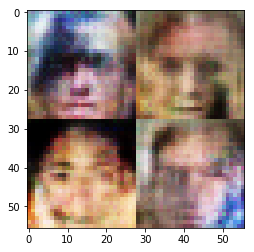

Epoch 0/1... Discriminator Loss: 0.2845... Generator Loss: 1.6596
Epoch 0/1... Discriminator Loss: 0.2646... Generator Loss: 1.8707
Epoch 0/1... Discriminator Loss: 0.2122... Generator Loss: 2.1118
Epoch 0/1... Discriminator Loss: 0.0434... Generator Loss: 5.3688


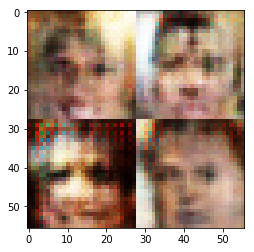

Epoch 0/1... Discriminator Loss: 0.0999... Generator Loss: 3.1183
Epoch 0/1... Discriminator Loss: 0.1989... Generator Loss: 2.0823
Epoch 0/1... Discriminator Loss: 0.3559... Generator Loss: 1.5367
Epoch 0/1... Discriminator Loss: 0.1216... Generator Loss: 2.6698


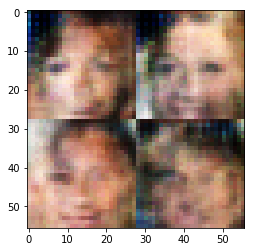

Epoch 0/1... Discriminator Loss: 0.2349... Generator Loss: 2.0887
Epoch 0/1... Discriminator Loss: 0.2417... Generator Loss: 1.9181
Epoch 0/1... Discriminator Loss: 0.8804... Generator Loss: 0.7007
Epoch 0/1... Discriminator Loss: 0.1462... Generator Loss: 3.3808


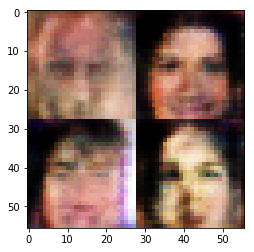

Epoch 0/1... Discriminator Loss: 1.4097... Generator Loss: 0.3958
Epoch 0/1... Discriminator Loss: 0.4936... Generator Loss: 2.5087
Epoch 0/1... Discriminator Loss: 0.8052... Generator Loss: 3.2630
Epoch 0/1... Discriminator Loss: 0.7108... Generator Loss: 1.0474


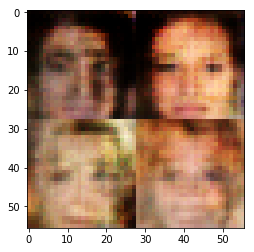

Epoch 0/1... Discriminator Loss: 2.7275... Generator Loss: 6.1538
Epoch 0/1... Discriminator Loss: 0.5425... Generator Loss: 2.2633
Epoch 0/1... Discriminator Loss: 1.5103... Generator Loss: 0.4476
Epoch 0/1... Discriminator Loss: 0.3210... Generator Loss: 2.2286


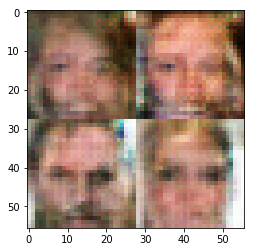

Epoch 0/1... Discriminator Loss: 0.3190... Generator Loss: 2.8331
Epoch 0/1... Discriminator Loss: 0.5468... Generator Loss: 1.4379
Epoch 0/1... Discriminator Loss: 0.5842... Generator Loss: 1.3036
Epoch 0/1... Discriminator Loss: 0.4575... Generator Loss: 1.3489


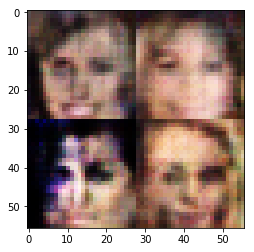

Epoch 0/1... Discriminator Loss: 0.5356... Generator Loss: 1.1908
Epoch 0/1... Discriminator Loss: 0.3298... Generator Loss: 1.9188
Epoch 0/1... Discriminator Loss: 0.4781... Generator Loss: 2.3873
Epoch 0/1... Discriminator Loss: 0.3613... Generator Loss: 1.8287


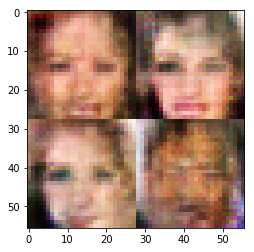

Epoch 0/1... Discriminator Loss: 0.4073... Generator Loss: 1.5648
Epoch 0/1... Discriminator Loss: 0.2052... Generator Loss: 2.2688
Epoch 0/1... Discriminator Loss: 0.1857... Generator Loss: 2.2765
Epoch 0/1... Discriminator Loss: 0.7016... Generator Loss: 1.0099


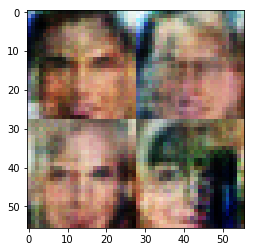

Epoch 0/1... Discriminator Loss: 0.5789... Generator Loss: 1.0309
Epoch 0/1... Discriminator Loss: 0.6854... Generator Loss: 1.0271
Epoch 0/1... Discriminator Loss: 0.2065... Generator Loss: 2.6278
Epoch 0/1... Discriminator Loss: 0.5050... Generator Loss: 1.2134


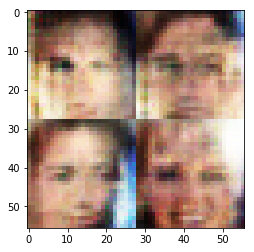

Epoch 0/1... Discriminator Loss: 0.3766... Generator Loss: 1.5748
Epoch 0/1... Discriminator Loss: 0.3571... Generator Loss: 1.6936
Epoch 0/1... Discriminator Loss: 0.2368... Generator Loss: 2.1008
Epoch 0/1... Discriminator Loss: 0.1536... Generator Loss: 3.3902


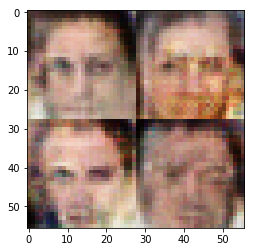

Epoch 0/1... Discriminator Loss: 0.1152... Generator Loss: 3.4606
Epoch 0/1... Discriminator Loss: 0.1956... Generator Loss: 2.0615
Epoch 0/1... Discriminator Loss: 0.1451... Generator Loss: 2.5364
Epoch 0/1... Discriminator Loss: 0.1042... Generator Loss: 3.7507


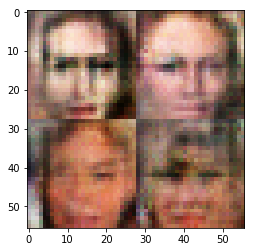

Epoch 0/1... Discriminator Loss: 0.4047... Generator Loss: 1.3079
Epoch 0/1... Discriminator Loss: 0.4292... Generator Loss: 1.4984
Epoch 0/1... Discriminator Loss: 0.2809... Generator Loss: 2.4059
Epoch 0/1... Discriminator Loss: 0.0492... Generator Loss: 3.6892


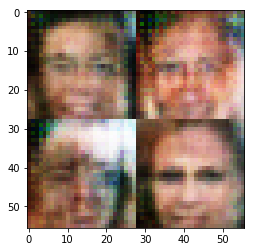

Epoch 0/1... Discriminator Loss: 0.1682... Generator Loss: 2.4313
Epoch 0/1... Discriminator Loss: 0.0713... Generator Loss: 3.5575
Epoch 0/1... Discriminator Loss: 0.0979... Generator Loss: 2.8191
Epoch 0/1... Discriminator Loss: 0.3555... Generator Loss: 1.4709


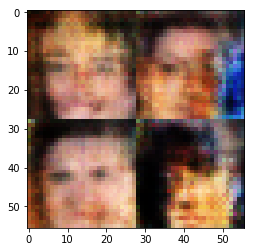

Epoch 0/1... Discriminator Loss: 0.5297... Generator Loss: 1.0903
Epoch 0/1... Discriminator Loss: 0.2226... Generator Loss: 1.9770
Epoch 0/1... Discriminator Loss: 0.3420... Generator Loss: 1.6138
Epoch 0/1... Discriminator Loss: 0.1345... Generator Loss: 2.9874


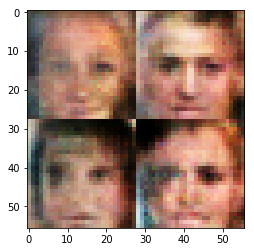

Epoch 0/1... Discriminator Loss: 1.1713... Generator Loss: 8.8711
Epoch 0/1... Discriminator Loss: 0.3373... Generator Loss: 1.8159
Epoch 0/1... Discriminator Loss: 0.5907... Generator Loss: 5.2985
Epoch 0/1... Discriminator Loss: 0.2387... Generator Loss: 5.2793


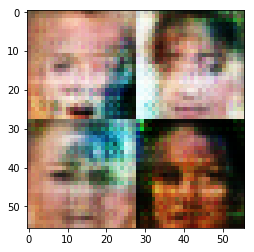

Epoch 0/1... Discriminator Loss: 0.6706... Generator Loss: 1.0510
Epoch 0/1... Discriminator Loss: 0.3266... Generator Loss: 1.4932
Epoch 0/1... Discriminator Loss: 0.2750... Generator Loss: 1.8844
Epoch 0/1... Discriminator Loss: 0.1753... Generator Loss: 2.6316


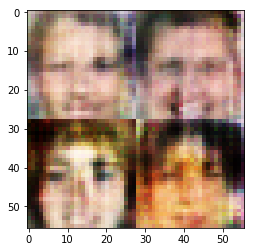

Epoch 0/1... Discriminator Loss: 0.2267... Generator Loss: 2.1419
Epoch 0/1... Discriminator Loss: 0.7893... Generator Loss: 0.9100
Epoch 0/1... Discriminator Loss: 0.5218... Generator Loss: 1.1447
Epoch 0/1... Discriminator Loss: 0.2906... Generator Loss: 1.6391


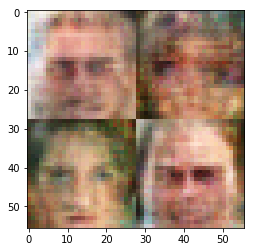

Epoch 0/1... Discriminator Loss: 0.2451... Generator Loss: 2.0255
Epoch 0/1... Discriminator Loss: 0.2454... Generator Loss: 1.8869
Epoch 0/1... Discriminator Loss: 0.2453... Generator Loss: 2.8030
Epoch 0/1... Discriminator Loss: 0.1515... Generator Loss: 2.2819


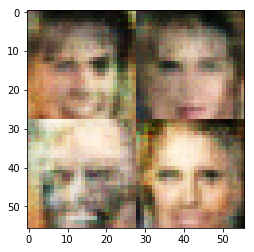

Epoch 0/1... Discriminator Loss: 0.0778... Generator Loss: 3.9775
Epoch 0/1... Discriminator Loss: 0.2132... Generator Loss: 1.9800
Epoch 0/1... Discriminator Loss: 0.1632... Generator Loss: 2.1617
Epoch 0/1... Discriminator Loss: 0.1165... Generator Loss: 2.7030


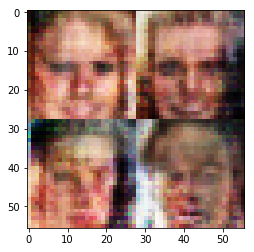

Epoch 0/1... Discriminator Loss: 0.2126... Generator Loss: 2.3605
Epoch 0/1... Discriminator Loss: 0.0879... Generator Loss: 3.1268
Epoch 0/1... Discriminator Loss: 0.1011... Generator Loss: 2.9588
Epoch 0/1... Discriminator Loss: 0.1741... Generator Loss: 2.5337


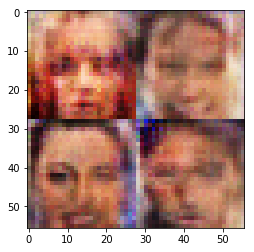

Epoch 0/1... Discriminator Loss: 0.6309... Generator Loss: 1.0538
Epoch 0/1... Discriminator Loss: 0.1503... Generator Loss: 2.7727
Epoch 0/1... Discriminator Loss: 0.1830... Generator Loss: 2.0632
Epoch 0/1... Discriminator Loss: 0.1641... Generator Loss: 2.3644


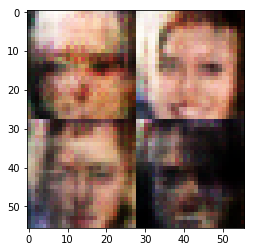

Epoch 0/1... Discriminator Loss: 0.2720... Generator Loss: 1.8519
Epoch 0/1... Discriminator Loss: 0.1215... Generator Loss: 2.4529
Epoch 0/1... Discriminator Loss: 0.1874... Generator Loss: 2.2516
Epoch 0/1... Discriminator Loss: 0.0983... Generator Loss: 3.0932


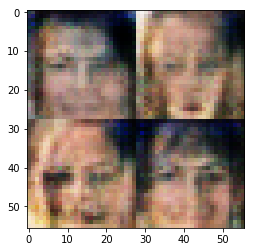

Epoch 0/1... Discriminator Loss: 0.6759... Generator Loss: 0.9344
Epoch 0/1... Discriminator Loss: 0.1043... Generator Loss: 3.5390
Epoch 0/1... Discriminator Loss: 0.1748... Generator Loss: 2.3753
Epoch 0/1... Discriminator Loss: 0.2728... Generator Loss: 1.9646


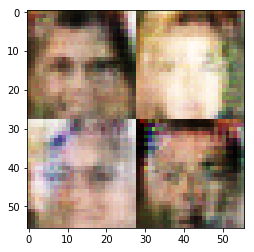

In [12]:
batch_size = 128
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode, show_interval = 20, print_interval = 5)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.